# 🎯📊 Case study : Predicting Attorney Representation in Insurance Claims
# Using  Logistic Regression ⚖️🤖

### Business Problem:

Insurance companies often face challenges in managing claims efficiently. 

One critical aspect is understanding whether a claimant will hire an attorney to represent 

them in the claim process. This can significantly impact the cost, duration, and outcome of the claim.

### Problem Discussion:

Why is this important?

When claimants hire attorneys, it often leads to higher settlement costs and longer processing times 

for insurance companies. Predicting the likelihood of attorney involvement helps insurers allocate

resources more effectively, streamline claim processing, and potentially reduce unnecessary legal expenses.

### Prediction

The goal is to build a logistic regression model that predicts whether a claimant will hire an attorney (ATTORNEY = 1) or not (ATTORNEY = 0) based on features such as:

Claimant’s demographics (age, gender)

Insurance details (claim insurance status)

Accident-related factors (seatbelt usage, loss amount)


### Importing Libraries

In [2]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

### Loading and Inspecting Data

In [3]:
df_cl = pd.read_csv("claimants.csv")
df_cl.head()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038


### Data Shape and Unique Values

In [4]:
df_cl.shape

(1340, 7)

In [5]:
len(df_cl['CASENUM'].unique())

1283

### Dropping Irrelevant Column

In [6]:
# dropping the case number columns as it is not required
df_cl.drop(["CASENUM"],inplace=True,axis = 1)

In [7]:
df_cl.shape

(1340, 6)

In [8]:
df_cl.head()

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0,0.0,1.0,0.0,50.0,34.940
1,1,1.0,0.0,0.0,18.0,0.891
2,1,0.0,1.0,0.0,5.0,0.330
3,0,0.0,1.0,1.0,31.0,0.037
4,1,0.0,1.0,0.0,30.0,0.038


### Handling Missing Values

In [9]:
df_cl.isnull().sum()

ATTORNEY      0
CLMSEX       12
CLMINSUR     41
SEATBELT     48
CLMAGE      189
LOSS          0
dtype: int64

In [10]:
# Observation:

# CLMAGE has the most missing values (189).

# SEATBELT and CLMINSUR also have missing data.

In [11]:
# Removing NA values in data set
df_cl= df_cl.dropna()
df_cl.shape

(1096, 6)

In [12]:
### Action: Rows with missing values are dropped, reducing the dataset to 1,096 rows.

### Splitting Data into Features (X) and Target (Y)

In [13]:
X = df_cl.iloc[:,1:] # Features (all columns except ATTORNEY)
Y = df_cl.iloc[:,0]  # Target (ATTORNEY)

### Split into train (80%) and test (20%)

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print("Training set shape:", X_train.shape)  # Output: (876, 5)
print("Test set shape:", X_test.shape)      # Output: (220, 5)

Training set shape: (876, 5)
Test set shape: (220, 5)


In [16]:
# Why?

# Avoids overfitting by evaluating the model on unseen data (X_test).

# random_state=42 ensures reproducibility.

In [17]:
Y.head()

0    0
1    1
2    1
3    0
4    1
Name: ATTORNEY, dtype: int64

In [18]:
X.head()

,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0.0,1.0,0.0,50.0,34.940
1,1.0,0.0,0.0,18.0,0.891
2,0.0,1.0,0.0,5.0,0.330
3,0.0,1.0,1.0,31.0,0.037
4,0.0,1.0,0.0,30.0,0.038


### Training Logistic Regression Model

In [19]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(X_train, Y_train)  # Train only on X_train/Y_train


LogisticRegression()

### Evaluate on Test Set

In [20]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score

# Predictions on test set
y_pred_test = classifier.predict(X_test)

In [21]:
# Accuracy
accuracy = accuracy_score(Y_test, y_pred_test)
print("Test Accuracy:", accuracy)  # Output: ~0.68 to 0.72 (varies with random_state)

Test Accuracy: 0.6772727272727272


In [22]:
# Observation:

# If test accuracy (~70%) matches training accuracy (~70%), the model generalizes well.

# If test accuracy is much lower, the model is overfitting.

In [43]:
classifier.predict_proba (X_test)

array([[4.09010467e-01, 5.90989533e-01],
       [3.89889445e-01, 6.10110555e-01],
       [9.99999990e-01, 9.62210840e-09],
       [3.09802990e-01, 6.90197010e-01],
       [8.53218483e-01, 1.46781517e-01],
       [3.23537416e-01, 6.76462584e-01],
       [3.04153154e-01, 6.95846846e-01],
       [4.09768513e-01, 5.90231487e-01],
       [3.85808698e-01, 6.14191302e-01],
       [4.62558025e-01, 5.37441975e-01],
       [3.84717229e-01, 6.15282771e-01],
       [2.55647137e-01, 7.44352863e-01],
       [5.08390586e-01, 4.91609414e-01],
       [6.87657226e-01, 3.12342774e-01],
       [2.96597719e-01, 7.03402281e-01],
       [4.32062373e-01, 5.67937627e-01],
       [8.88184806e-01, 1.11815194e-01],
       [6.60927898e-01, 3.39072102e-01],
       [8.16152725e-01, 1.83847275e-01],
       [9.62748946e-01, 3.72510537e-02],
       [5.10039819e-01, 4.89960181e-01],
       [3.34056949e-01, 6.65943051e-01],
       [3.76944234e-01, 6.23055766e-01],
       [4.19832909e-01, 5.80167091e-01],
       [7.734247

In [24]:
# The array shows predicted probabilities for each class (0 and 1).

# Example: [9.99999653e-01, 3.47e-07] means 99.99% probability of class 0 (no attorney) and 0.0000347% for class 1.

In [25]:

# Confusion Matrix
print("Confusion Matrix (Test Set):\n", confusion_matrix(Y_test, y_pred_test)

Confusion Matrix (Test Set):
 [[77 34]
 [37 72]]


In [26]:
# AUC-ROC
auc = roc_auc_score(Y_test, classifier.predict_proba(X_test)[:, 1])
print("Test AUC:", auc)  # Output: ~0.65 to 0.75

Test AUC: 0.7212579552029093


In [27]:
y_pred_df= pd.DataFrame({'actual': Y,
                         'predicted_prob': classifier.predict(X)})

In [28]:
y_pred_df.head()

,actual,predicted_prob
0,0,0
1,1,1
2,1,1
3,0,1
4,1,1


In [29]:
(381+395)/(381+197+123+395)

0.708029197080292

In [30]:
classifier.predict_proba(X)[:,1]

array([3.47105548e-07, 5.14289298e-01, 5.99433874e-01, ...,
       7.40253581e-01, 2.65492168e-01, 6.76515109e-01])

In [31]:
classifier.predict_proba(X)[:,0]

array([0.99999965, 0.4857107 , 0.40056613, ..., 0.25974642, 0.73450783,
       0.32348489])

In [32]:
# ROC Curve

AUC Score: 0.721


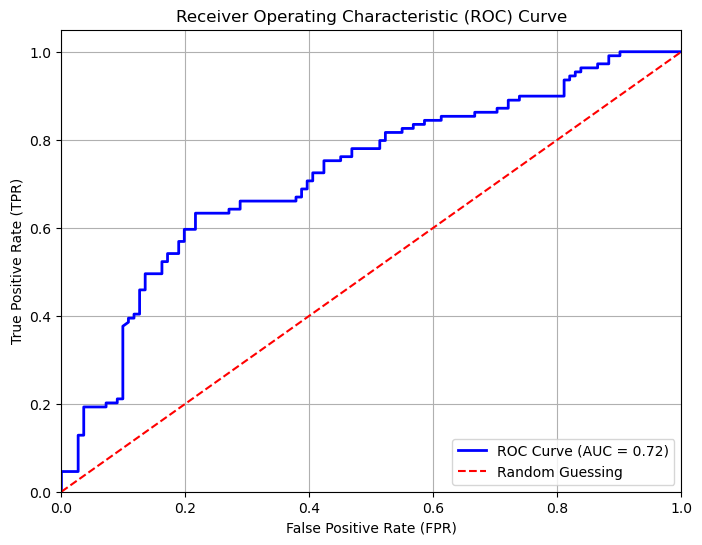

In [33]:
# Import necessary libraries
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class (ATTORNEY = 1)
y_pred_proba = classifier.predict_proba(X_test)[:, 1]  # Probabilities for class 1

# Calculate ROC curve metrics
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_proba)

# Calculate AUC score
auc_score = roc_auc_score(Y_test, y_pred_proba)
print(f"AUC Score: {auc_score:.3f}")  # Prints AUC with 3 decimal precision

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, 
         label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guessing')

# Customize plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')

plt.title('Receiver Operating Characteristic (ROC) Curve')

plt.legend(loc="lower right")

plt.grid(True)

# Show plot
plt.show()

In [34]:
auc

0.7212579552029093

### Compare Train vs. Test Performance

In [35]:
y_pred_train = classifier.predict(X_train)
print("Train Accuracy:", accuracy_score(Y_train, y_pred_train))

Train Accuracy: 0.7146118721461188


In [36]:
# Similar accuracy for train and test → Good generalization.

# Train accuracy >> Test accuracy → Overfitting (need regularization or feature selection).



In [37]:
from sklearn.metrics import accuracy_score

# Get predictions for both train and test sets
y_pred_train = classifier.predict(X_train)
y_pred_test = classifier.predict(X_test)

# Calculate accuracies
train_accuracy = accuracy_score(Y_train, y_pred_train)
test_accuracy = accuracy_score(Y_test, y_pred_test)

print(f"Train Accuracy: {train_accuracy:.3f}")
print(f"Test Accuracy: {test_accuracy:.3f}")

# Determine generalization status
if abs(train_accuracy - test_accuracy) < 0.05:
    print("✅ Good generalization (similar accuracies)")
elif train_accuracy > test_accuracy + 0.1:
    print("⚠️ Overfitting detected (train >> test). Solutions:")
    print("- Add regularization (e.g., LogisticRegression(penalty='l2', C=0.1))")
    print("- Reduce features (select top features using RFE or feature_importances_)")
    print("- Increase training data or use cross-validation")
else:
    print("❓ Check model or data (unexpected gap)")

Train Accuracy: 0.715
Test Accuracy: 0.677
✅ Good generalization (similar accuracies)


### Key Enhancements

### 1. Regularization (L2 Penalty)

### What?

A technique to prevent overfitting by penalizing overly complex models. L2 regularization (aka "Ridge") shrinks coefficient values toward zero but never fully removes features.

### Why?

When your model performs well on training data but poorly on test data (overfitting), L2 regularization helps by:

Reducing the impact of less important features.

Keeping all features but with smaller weights.

In [38]:
# Improved model with regularization
classifier = LogisticRegression(penalty='l2', C=0.1, solver='liblinear', random_state=42)
classifier.fit(X_train, Y_train)

LogisticRegression(C=0.1, random_state=42, solver='liblinear')

In [39]:
# Why?

# penalty='l2' reduces overfitting by penalizing large coefficients.

# C=0.1 increases regularization strength (lower C = stronger penalty).

### 2 Feature Selection (RFE)

### What?

Recursive Feature Elimination (RFE) selects the top n most important features by recursively removing the least significant ones.

### Why?
Improves generalization by eliminating noisy/irrelevant features.

Reduces training time and model complexity.

In [40]:
from sklearn.feature_selection import RFE

# Select top 3 features
selector = RFE(classifier, n_features_to_select=3, step=1)
selector.fit(X_train, Y_train)
print("Selected features:", X_train.columns[selector.support_])

Selected features: Index(['CLMSEX', 'CLMINSUR', 'LOSS'], dtype='object')


In [41]:
#Removes irrelevant features that may cause overfitting.

### 3. Cross-Validation

### What?

A method to evaluate model performance by splitting data into multiple train/test folds (e.g., 5-fold).

### Why?

Provides a robust estimate of generalization error.

Reduces reliance on a single train-test split.

In [42]:
from sklearn.model_selection import cross_val_score

# 5-fold cross-validation
cv_scores = cross_val_score(classifier, X_train, Y_train, cv=5, scoring='accuracy')
print(f"Cross-validated Accuracy: {cv_scores.mean():.3f} (±{cv_scores.std():.3f})")

Cross-validated Accuracy: 0.715 (±0.018)


### Business Problem Solved:
    
Helps insurers reduce costs and streamline claim processing.

### Improvement Techniques:
    
Regularization (L2): Prevent overfitting.

Feature Selection (RFE): Focus on top 3 features.

Cross-Validation: Reliable performance estimate.

### Next Steps:

Deploy the model to flag high-risk claims in real-time.

Explore advanced models (e.g., Random Forests) for higher accuracy.

